<h1 style="text-align:center">Titanic Dataset</h1>

* Titanic was considered unsinkable ship
* sank after colliding with an iceberg
* death of 1502 out of 2224 passengers
* While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others
* what sorts of people were more likely to survive? (using ML)

<h2>Importing necessary libraries</h2>

In [2]:
#importing libraries
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<h2>Importing the train Titanic dataset</h2>

In [3]:
#importing dataset
df = pd.read_csv('titanic_train.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_train.csv'

<h3>Data Discription:</h3>

<b>survival:</b>  Survival (0 = No; 1 = Yes)

<b>pclass:</b>  Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

<b>name:</b>  Name

<b>sex:</b>  Sex

<b>age:</b>  Age

<b>sibsp:</b>  Number of Siblings/Spouses Aboard

<b>parch:</b>  Number of Parents/Children Aboard

<b>ticket:</b>  Ticket Number

<b>fare:</b>  Passenger Fare

<b>cabin:</b>  Cabin

<b>embarked:</b>  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<h2>Preprocessing</h2>
This section is about data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>The number of empty or null data in datasets are</h3>

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

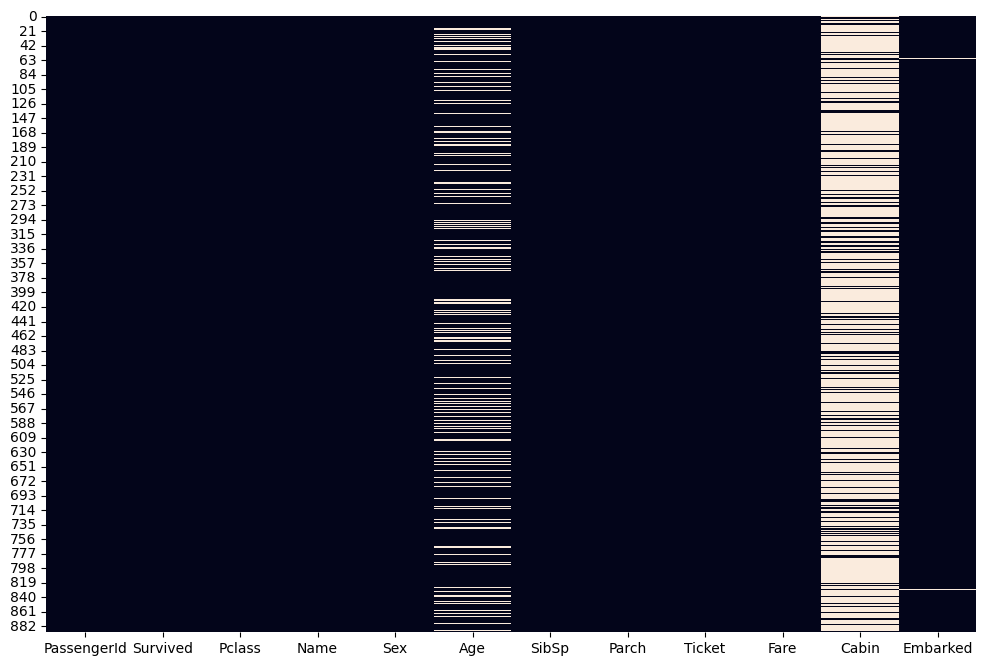

In [9]:
#heatmap to see number of null values
plt.figure(figsize=(12,8))

sns.heatmap(df.isnull(),cbar=False)

there are many missing values are present in the <b>Age</b> column and lots of missing values are there in <b>Cabin</b> column

<h3>The number of individuals that survived are:</h3>

In [12]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [27]:
# df['Survived'].value_counts()[1]

342

<Axes: xlabel='Survived', ylabel='count'>

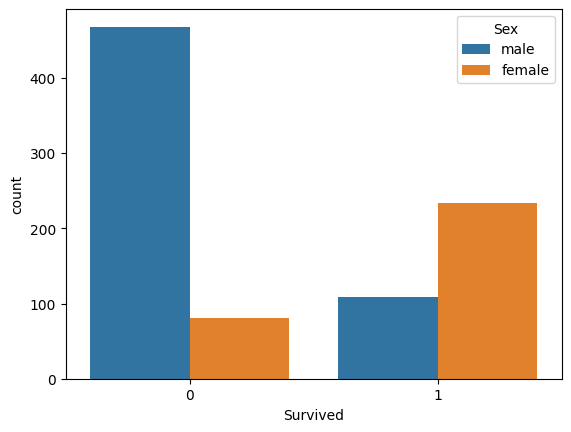

In [11]:
# Survival of Male and Female
sns.countplot(x='Survived',data=df,hue = 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

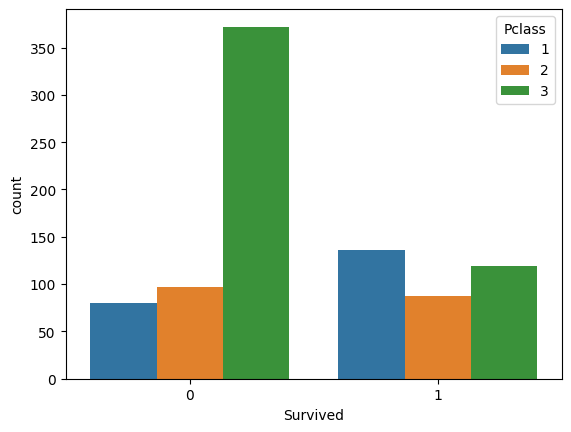

In [12]:
# Survival Based on Pclass
sns.countplot(x='Survived',data=df,hue = 'Pclass')

<Axes: ylabel='Frequency'>

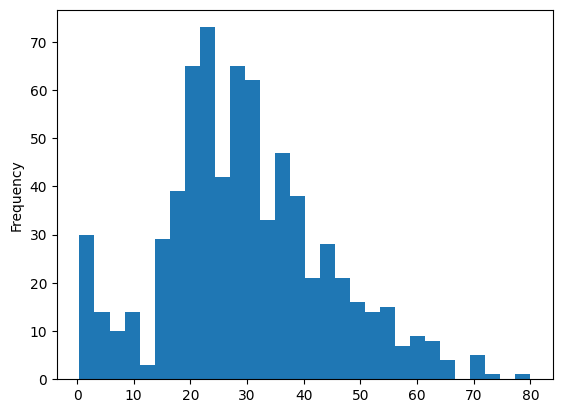

In [13]:
df['Age'].dropna().plot.hist(bins=30)

This histogram helps us to understand that many of the passengers that were present in the titanic were of age range 20-35 years.

<Axes: xlabel='SibSp', ylabel='count'>

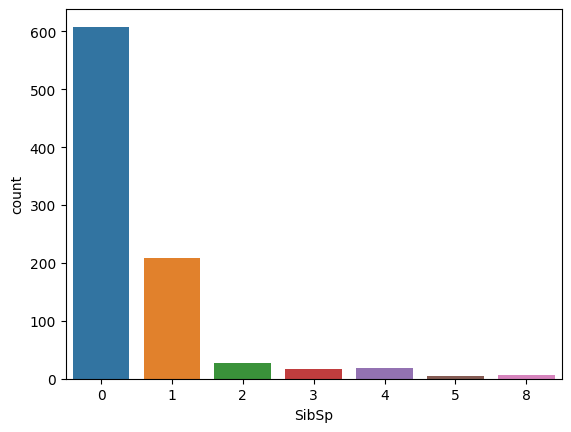

In [14]:
sns.countplot(x='SibSp',data=df)

Indicates: most of them were single

In [25]:
# #fare tickets
# df['Fare'].hist(bins=20,figsize=(10,4))

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


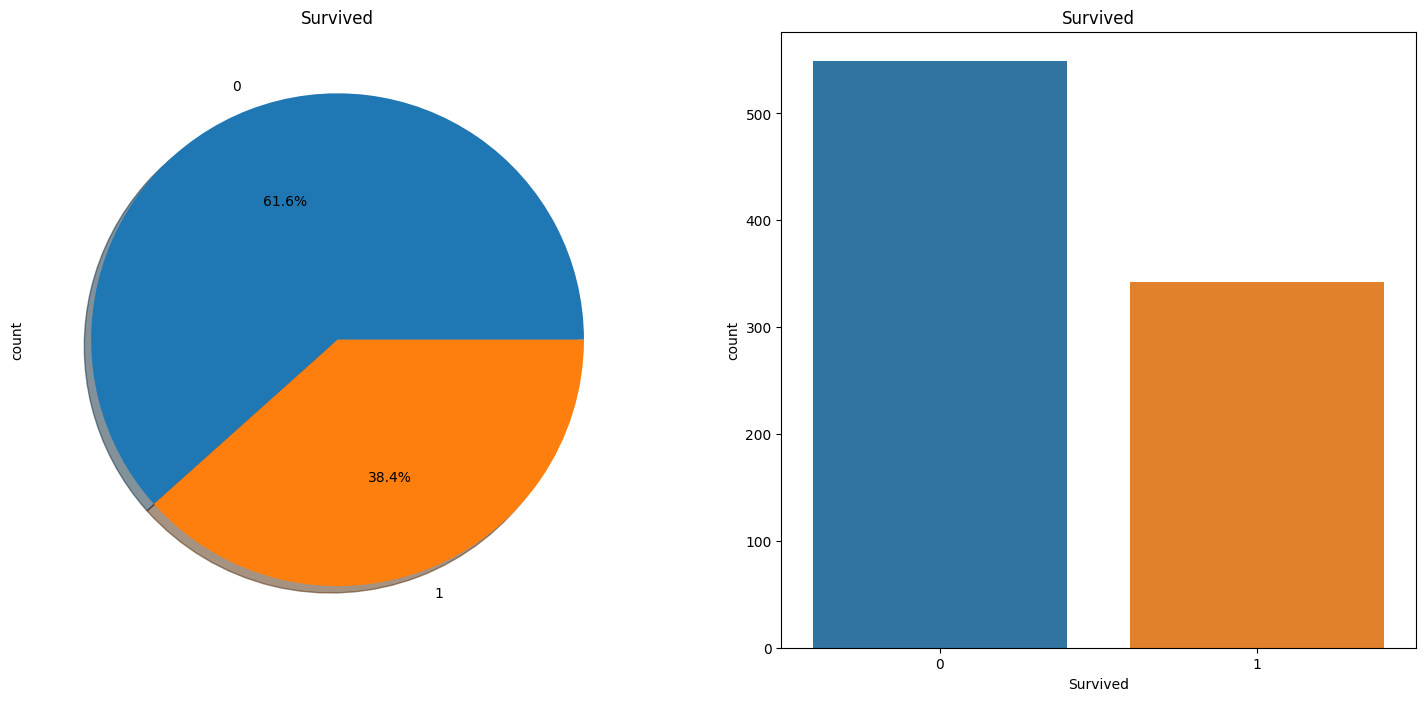

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(18, 8))   #used to plot multiple figure in same row
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True) # The ax=ax[0] specifies that the pie chart will be plotted on the first subplot
ax[0].set_title('Survived')
sns.countplot(data=df, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

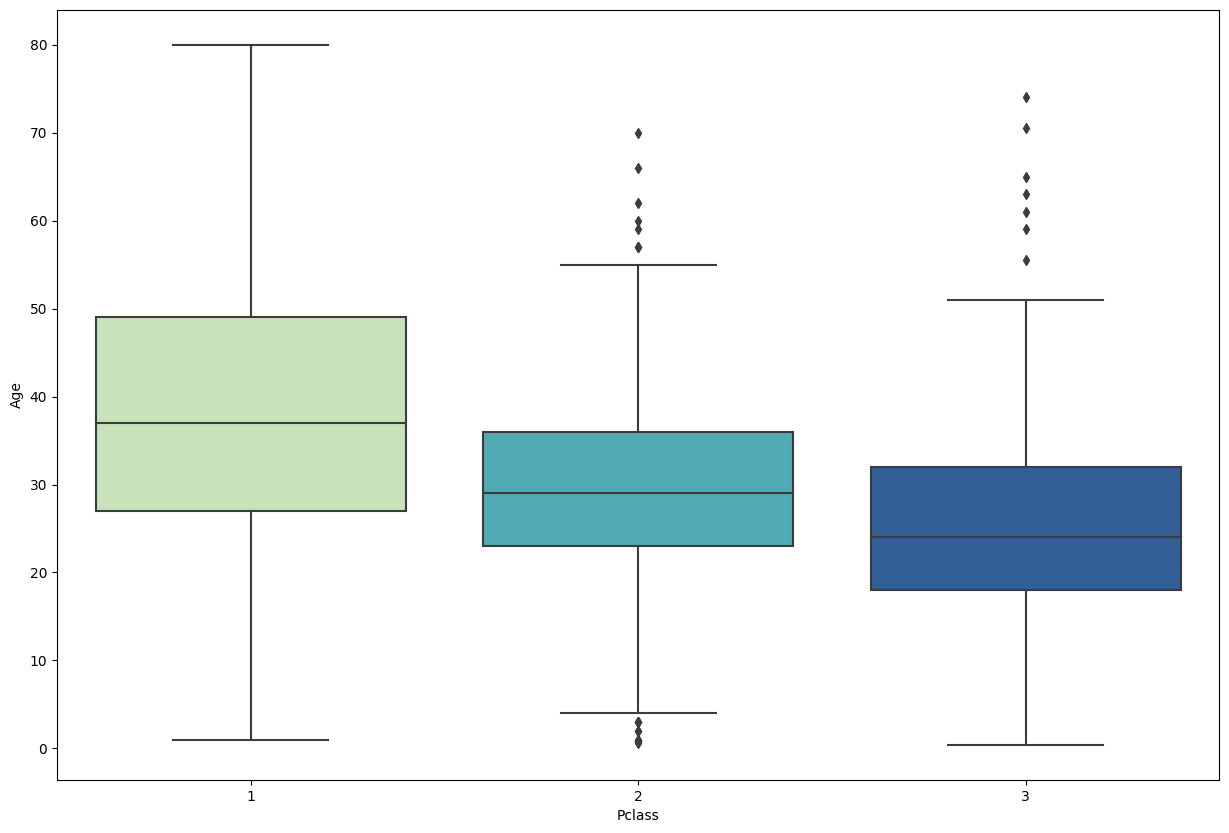

In [5]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=df, palette = 'YlGnBu')

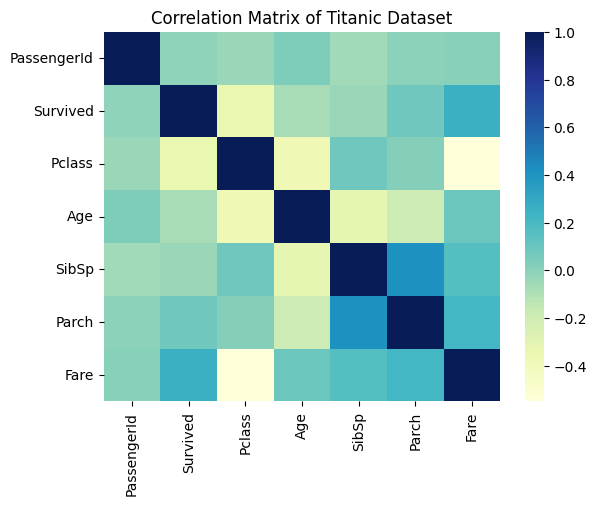

In [7]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()
plt.show()

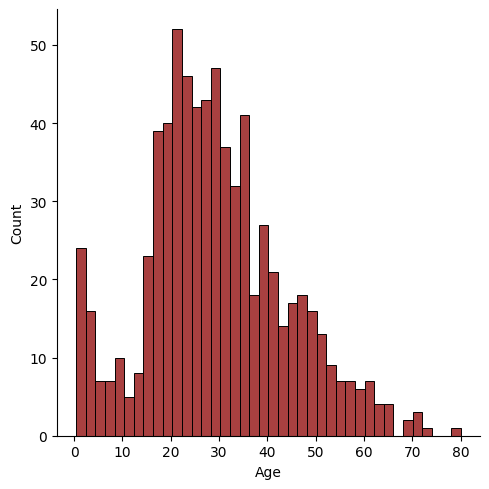

In [8]:
sns.displot(df['Age'].dropna(), kde = False, color = 'darkred', bins =40)

<Axes: xlabel='SibSp', ylabel='count'>

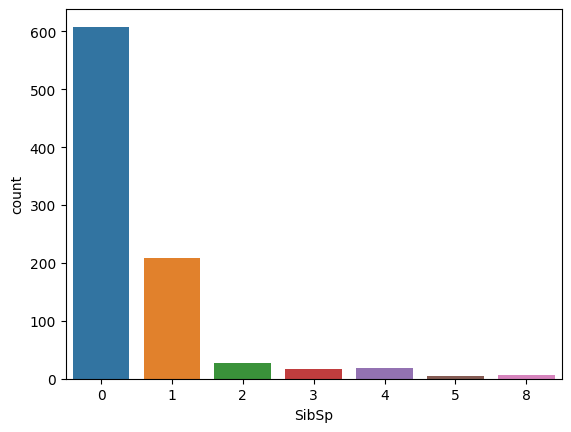

In [9]:
sns.countplot(x = 'SibSp', data = df)

<h2 style="text-align:center">Catagorical data analysis</h2>

<h3>Total number of passengers abroad the ship based on gender:</h3>

In [66]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

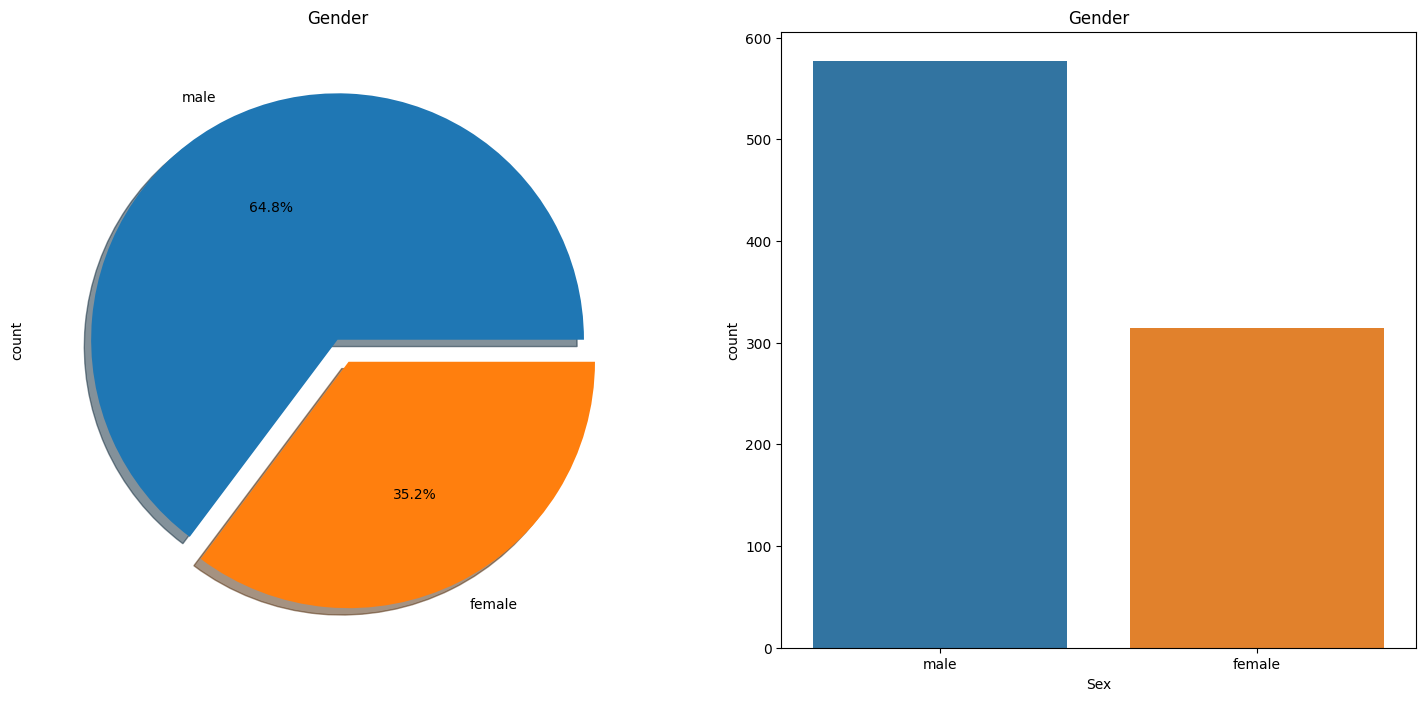

In [68]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
sns.countplot(data=df, x='Sex',ax=ax[1])
ax[1].set_title('Gender')
plt.show()

<h3>The survival rates of passenger based on gender</h3>

In [70]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

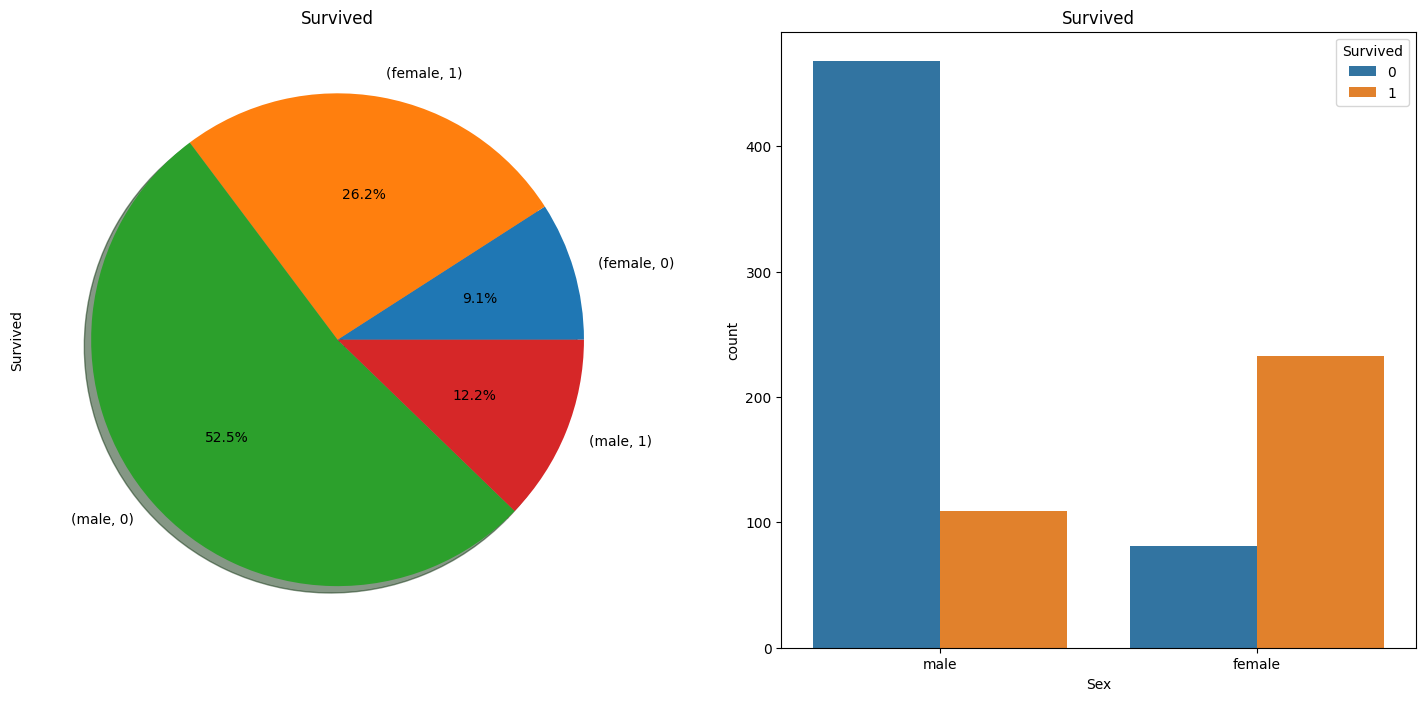

In [73]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df.groupby(['Sex','Survived'])['Survived'].count().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot(data=df, x='Sex',hue='Survived',ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h3>Creating new column i.e if they were travelling alone</h3>

In [74]:
df['Alone'] = df['SibSp'] + df['Parch']
df['Alone'] = df['Alone'].apply(lambda x: 0 if x > 0 else 1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [75]:
df['Alone'].value_counts()

Alone
1    537
0    354
Name: count, dtype: int64

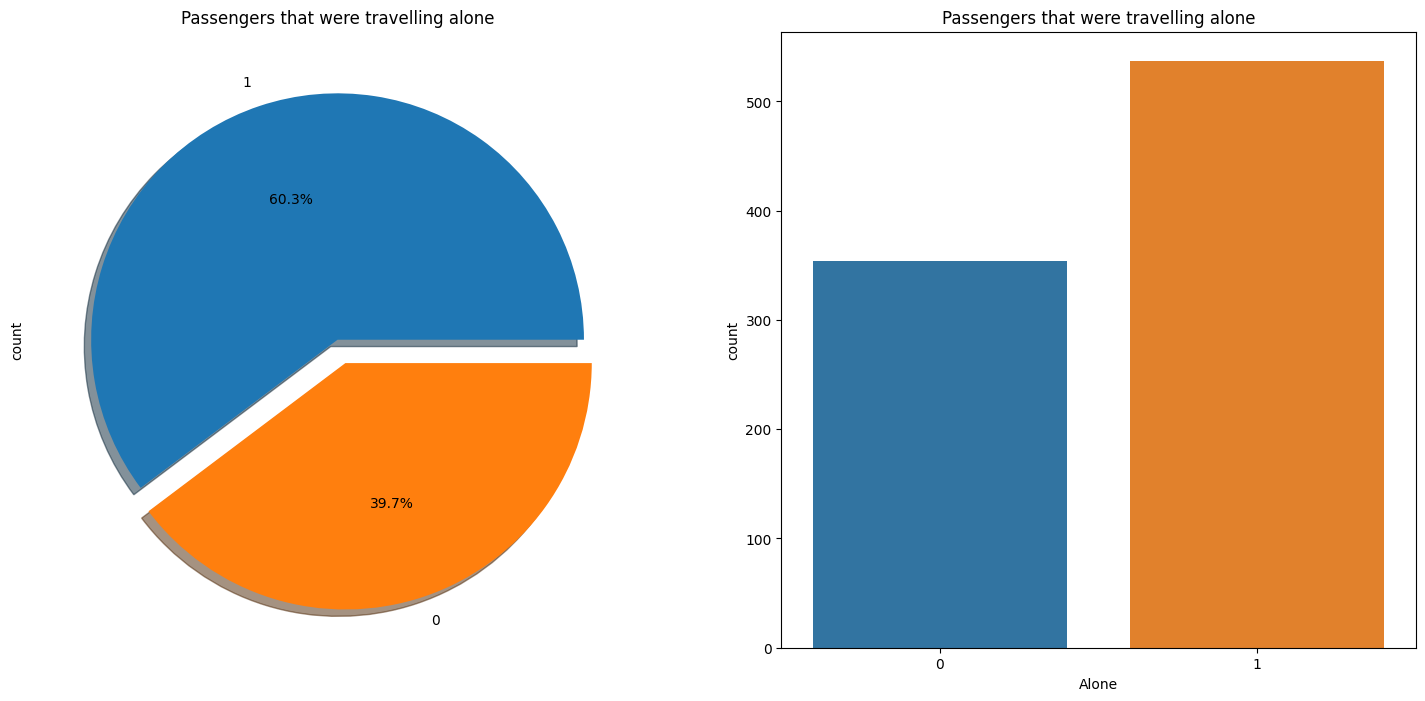

In [76]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Alone'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Passengers that were travelling alone')
sns.countplot(data=df, x='Alone',ax=ax[1])
ax[1].set_title('Passengers that were travelling alone')
plt.show()

<h3>The number of survivers that travelled alone</h3>

In [80]:
df.groupby(['Alone','Survived'])['Survived'].count()


Alone  Survived
0      0           175
       1           179
1      0           374
       1           163
Name: Survived, dtype: int64

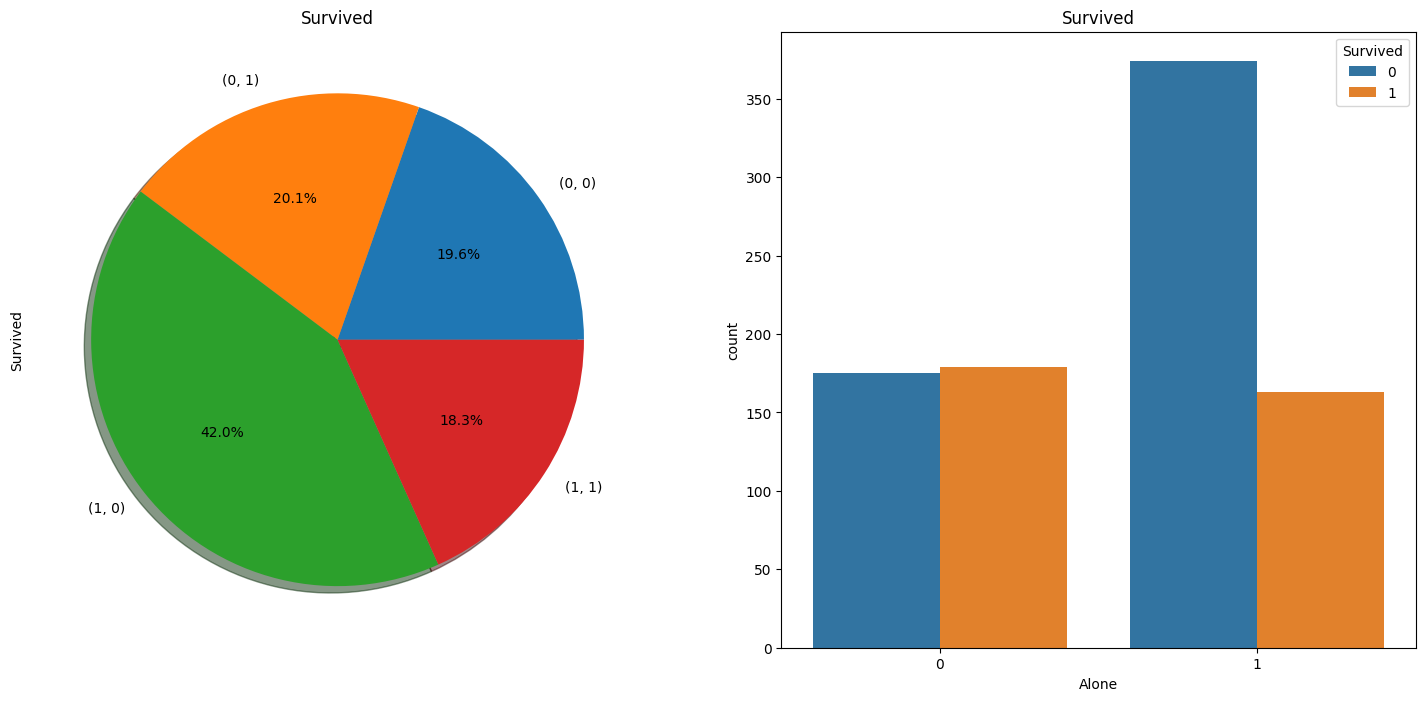

In [81]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df.groupby(['Alone','Survived'])['Survived'].count().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot(hue='Survived', x='Alone',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h3>Creating a new column i.e Married or unmarried</h3>

In [83]:
def married(name):
    if 'Master.' in name:
        return 1
    if 'Mrs.' in name:
        return 1
    else:
        return 0

df['Married'] = df['Name'].apply(married)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [84]:
df['Married'].value_counts()

Married
0    726
1    165
Name: count, dtype: int64

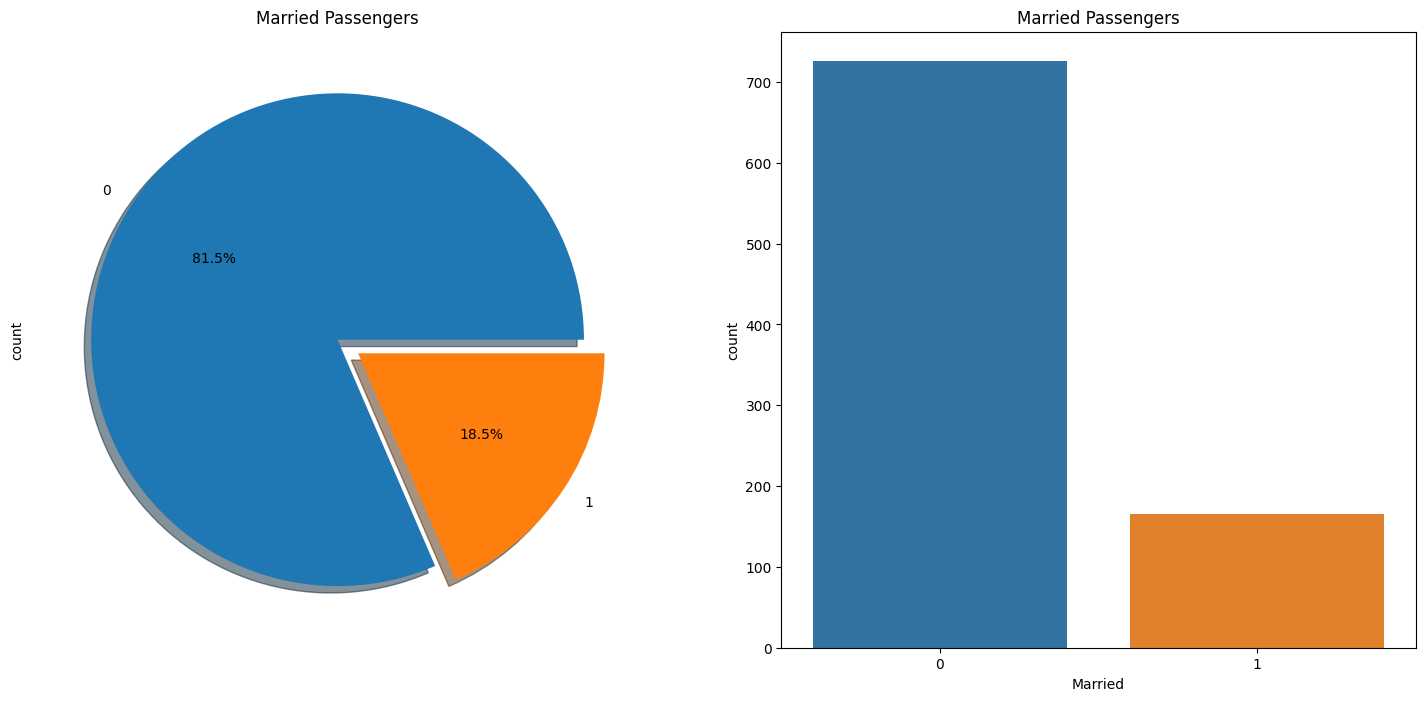

In [86]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Married Passengers')
sns.countplot(x='Married',data=df,ax=ax[1])
ax[1].set_title('Married Passengers')
plt.show()

<h3>Married vs Survived</h3>

In [87]:
df.groupby(['Married','Survived'])['Survived'].count()

Married  Survived
0        0           506
         1           220
1        0            43
         1           122
Name: Survived, dtype: int64

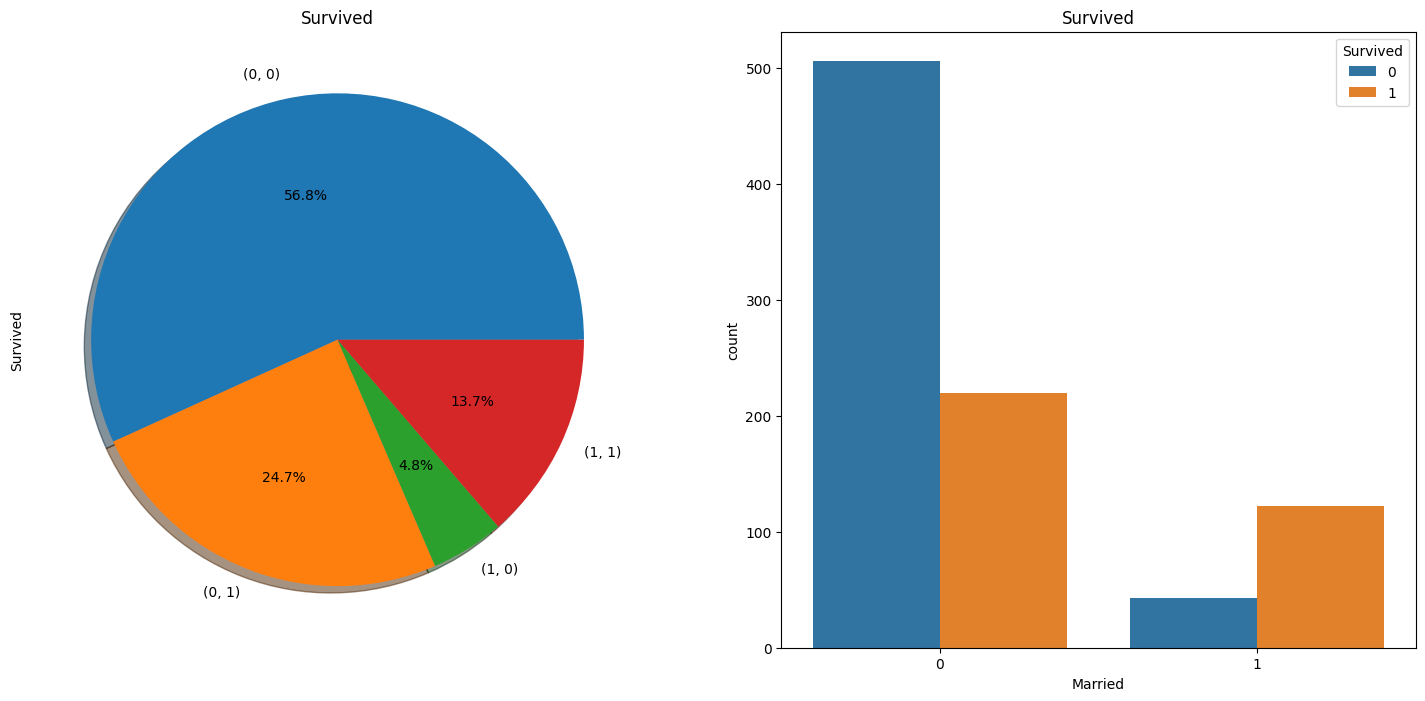

In [88]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df.groupby(['Married','Survived'])['Survived'].count().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot(x='Married',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h2>Conclusion</h2>

<p>From the above analysis we can make the following assumptions:</p>
1)The Female passengers had a more chances of surviving incident, as more females survived <br>the incident even though the number of males abroad the ship was greater<br><br>
2)The passengers that were travelling with family or with siblings had more chances of surviving<br><br>
3)Married passenger had more chances of surviving
<br><br>
<b><i>The assumtion of married and sibling might be wrong</i></b>

In [90]:
df.groupby(['Alone','Married','Survived'])['Survived'].count()

Alone  Married  Survived
0      0        0           134
                1            75
       1        0            41
                1           104
1      0        0           372
                1           145
       1        0             2
                1            18
Name: Survived, dtype: int64

<h2 style="text-align:center">Ordinal data analysis</h2>


<h3>Based on passenger class</h3>

In [91]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

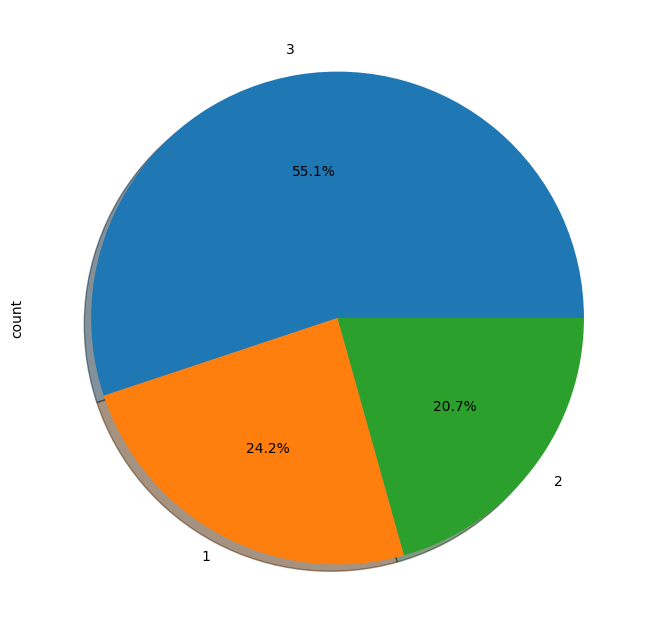

In [92]:
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(18,8))
plt.show()

<h3>Class vs Survived</h3>

In [93]:
dataset.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

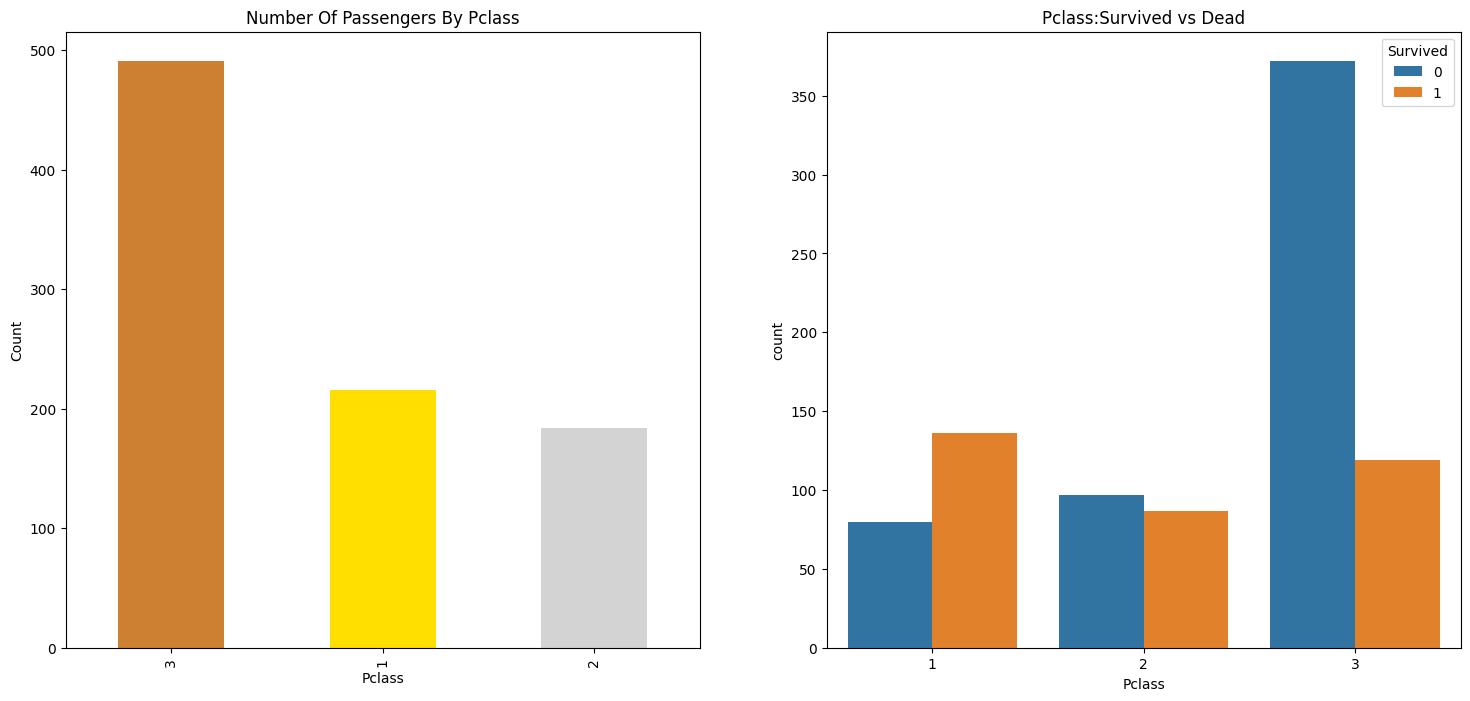

In [94]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

<h3>Embarked</h3>

The Embarked can be viewed as an Ordianal data as the route of the titanic ship was<br>

Southampton(England)->Cherbourbg(France)->Queenstown(Ireland)---(X)-->Newyork(USA)

<br> so we are changing S->1,C->2,Q->3

In [95]:
def embarked(emb):
    if emb == 'S':
        return 1
    if emb == 'C':
        return 2
    if emb == 'Q':
        return 3
    else: #for null data returning S i.e 1 as it has greatest value
        return 1

df['Embarked'] = df['Embarked'].apply(embarked)

In [96]:
dataset['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<h2>Changing the null data in Embarked</h2>

In [97]:
dataset['Embarked'].isnull().sum()

2

<h2>Graphical representation of embarked</h2>

In [98]:
dataset.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

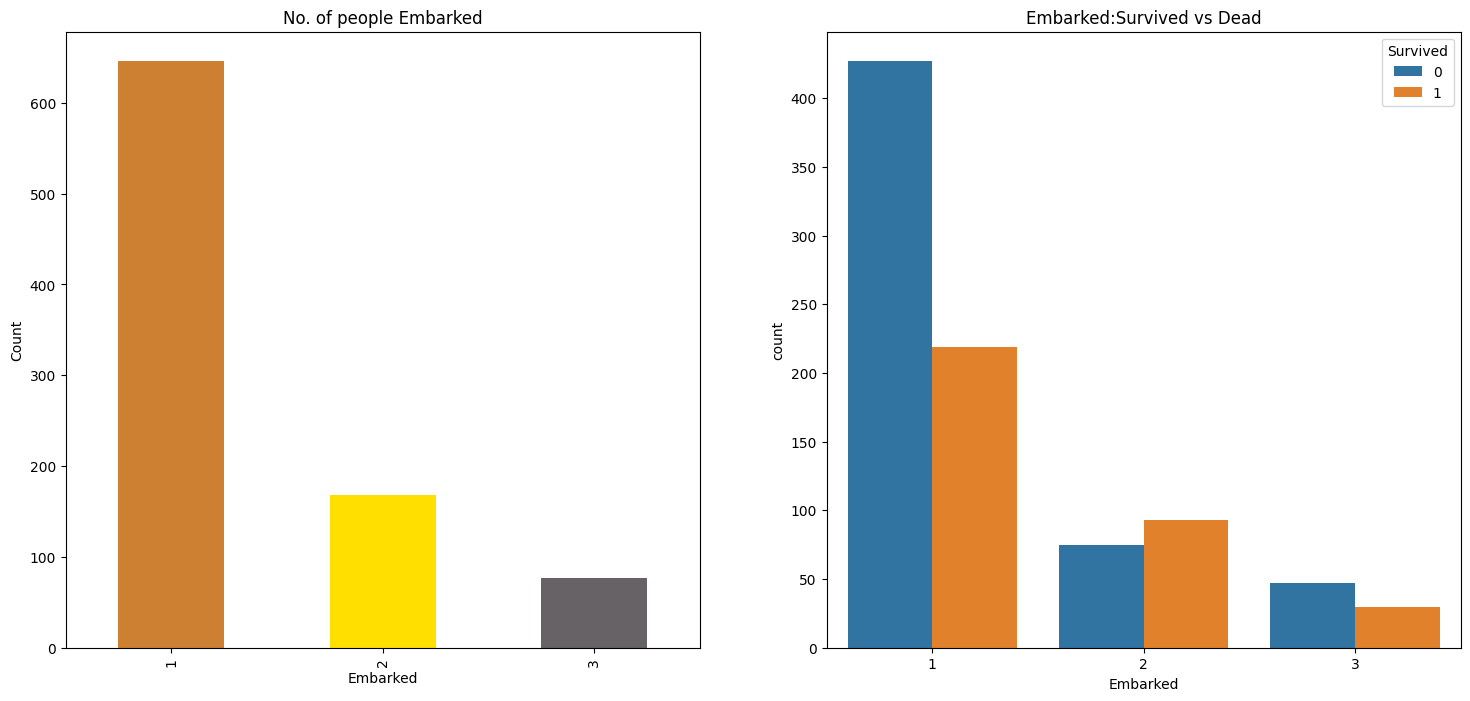

In [99]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Embarked'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#666266'],ax=ax[0])
ax[0].set_title('No. of people Embarked')
ax[0].set_ylabel('Count')
sns.countplot(x='Embarked',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

<p>The maximum number of people departed from port 1 i.e. Southampton, England and the same port has maximum number of surviors</p>
<p>Port B i.e Cherborg france has the maximum rate of ratio of surviors<p>
<p>The minimum number of people departed from port 3 i.e. Queensland, Ireland and had the most number of causlaties</p>
<i>This can because of the class where people embarked from</i>

In [100]:
df.groupby(['Embarked','Pclass'])['Pclass'].count()

Embarked  Pclass
1         1         129
          2         164
          3         353
2         1          85
          2          17
          3          66
3         1           2
          2           3
          3          72
Name: Pclass, dtype: int64

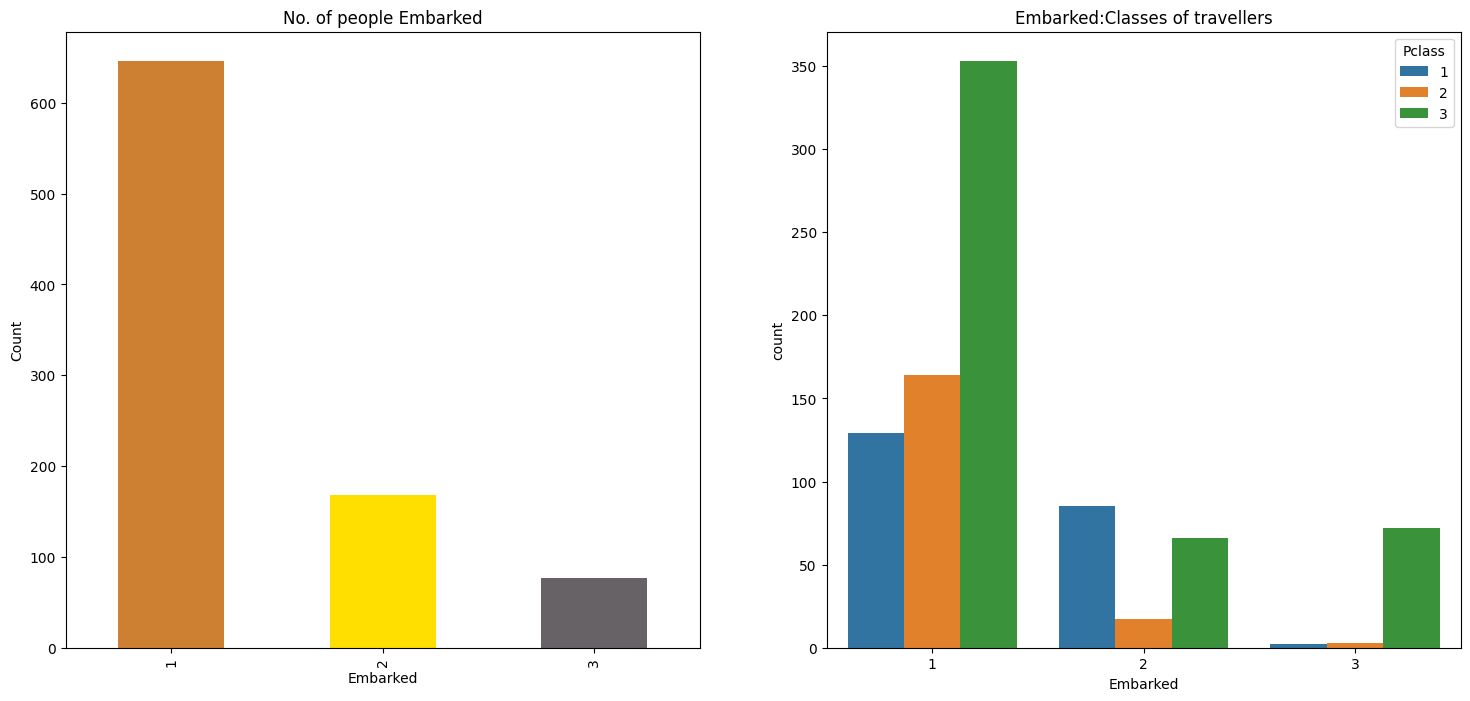

In [101]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Embarked'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#666266'],ax=ax[0])
ax[0].set_title('No. of people Embarked')
ax[0].set_ylabel('Count')
sns.countplot(x='Embarked',hue='Pclass',data=df,ax=ax[1])
ax[1].set_title('Embarked:Classes of travellers')
plt.show()

<p>The reason behind the survival rate of port 2 (i.e Cherborg, France) is the class of passenger as most of passenger are from Class 1 in port 3 </p>

<h2 style="text-align:center">Continous data analysis</h2>


<h3>The number of missing value in dataset is:</h3>

In [103]:
df['Age'].isnull().sum()

177

In [110]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass'])['Age'].transform('median')
age_by_pclass_sex

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: Age, Length: 891, dtype: float64

In [107]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass'])['Age'].transform('median')

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}: {}'.format(pclass, sex, age_by_pclass_sex[(df['Pclass'] == pclass) & (df['Sex'] == sex)].median()))

print('Median age of all passengers: {}'.format(df['Age'].median()))

df['Age'] = age_by_pclass_sex

Median age of Pclass 1 female: 35.0
Median age of Pclass 1 male: 40.0
Median age of Pclass 2 female: 28.0
Median age of Pclass 2 male: 30.0
Median age of Pclass 3 female: 21.5
Median age of Pclass 3 male: 25.0
Median age of all passengers: 28.0


In [111]:
df['Age'].isnull().sum()


0

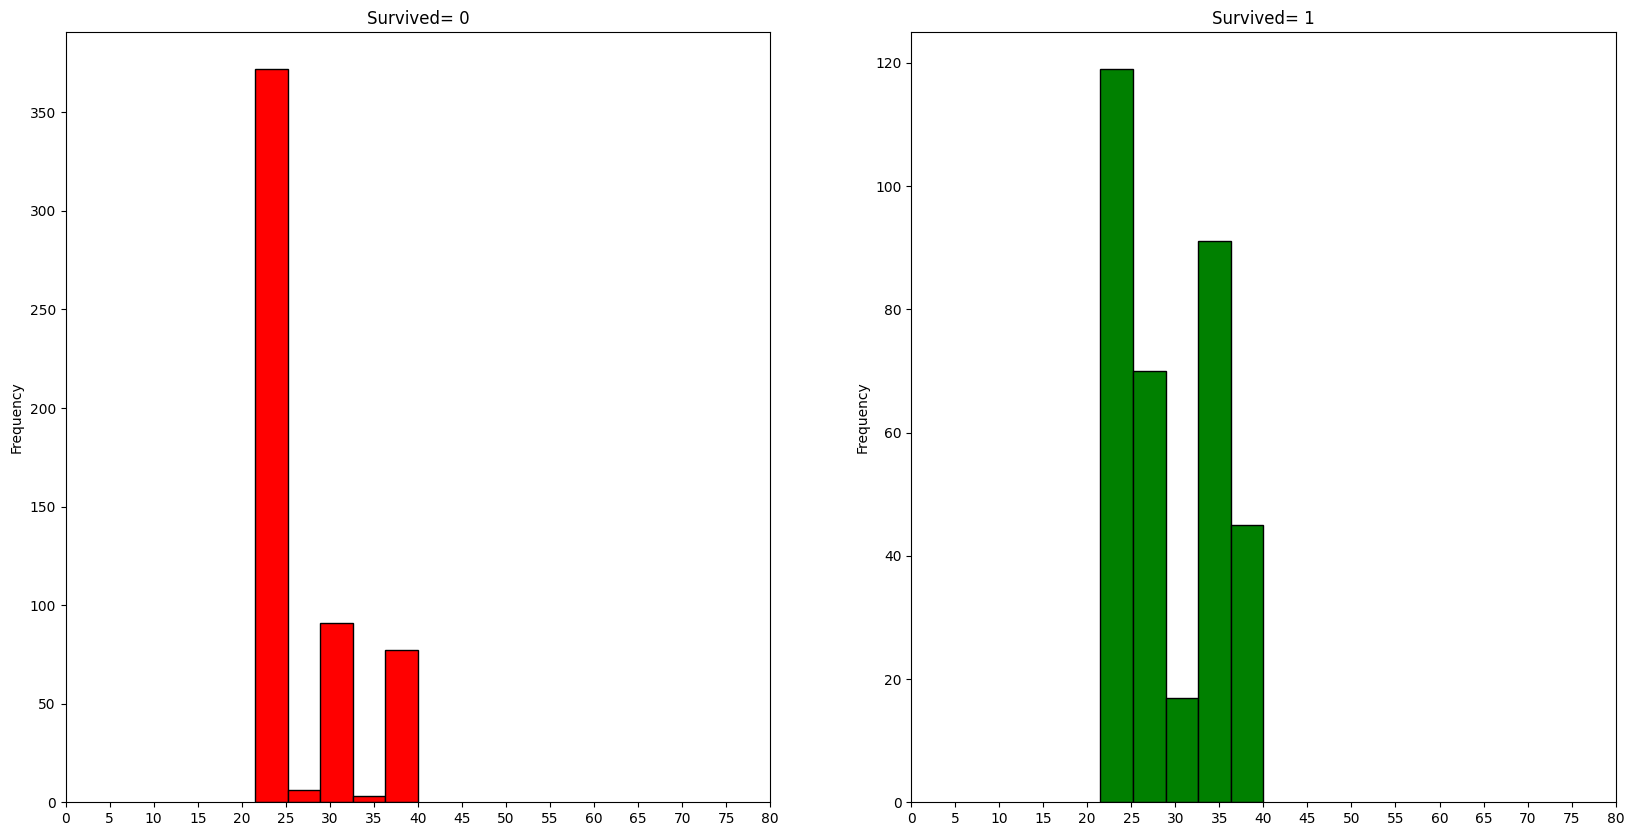

In [116]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=5,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=5,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()